In [1]:
# Make the libraries directory searchable for Python imports
import sys
sys.path.insert(1, '../libraries')

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

        
# Common imports
import numpy as np
import os
from pathlib import Path
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# Plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


No GPU was detected. LSTMs and CNNs can be very slow without a GPU.


In [3]:
# Data pipeline, scaling, normalizing, etc
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.mixture import GaussianMixture

# Transforming & Manipulating data
from sklearn.compose import ColumnTransformer

# The Linear Regression model
from sklearn.linear_model import LinearRegression

In [4]:
# Import functions from the utilities file
from TZVOLCANO_utilities import *
from TZVOLCANO_plotting import *
from TZVOLCANO_gaussian_mixtures import *
from TZVOLCANO_kmeans import *
from TZVOLCANO_neural_net import *

# Early version of chords GUI interface
from chords_gui import chords_gui 

In [5]:
# Define important variables that control 

n_steps_training = 5 * 1000 # The number of data points to use in the training set
n_steps_forecast = 500       #The number of data points to display in the predictions graph

n_steps_ahead = 30 # the number of steps ahead that the neural net will predict

scale_minimum = 0
scale_maximum = 1


In [6]:

# Render the data download widget
domain = 'tzvolcano.chordsrt.com'
chords = chords_gui(domain)

# Define the initial start and end date for the date selector
start_date_string = '2021-01-01'
end_date_string = '2021-01-05'

# Generate the uer interface
chords.start_end_widgets(start_date_string, end_date_string)

Output()

In [9]:
chords.select_data_file()

Available Data Files


Output()

In [10]:
# Read the fileselected file to use
file_name = chords.available_data_files.value
print("Imported csv dat from" + file_name)

unmodified_data = chords.load_data_from_file(file_name)

Imported csv dat fromtzvolcano_chordsrt_com_instrument_id_1_2021-01-01_to_2021-01-05.csv
csv_files/tzvolcano_chordsrt_com_instrument_id_1_2021-01-01_to_2021-01-05.csv


In [13]:
# Remove the "Time" variable from the data set, as it is not useful for the model
unmodified_height_and_time_data = unmodified_data.drop(["Longitude", "Latitude"], axis=1)

unmodified_height_data = unmodified_height_and_time_data.drop(["Time"], axis=1)

# Print out the remaing variable names, just to see we did remove "Time"
print(unmodified_height_data.keys())
print(type(unmodified_height_data))
print(unmodified_height_data.size)

Index(['Height'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
244348


<AxesSubplot:xlabel='Time', ylabel='Height (m)'>

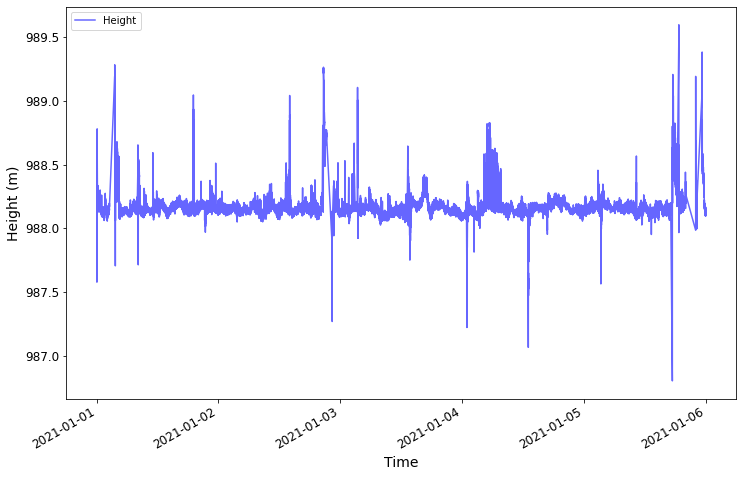

In [25]:
plt.figure(figsize=(12, 8))

ax = plt.gca() # get current axis
alpha = 0.6
unmodified_data.plot(kind='line',x='Time',y='Height', color='blue',ax=ax, alpha=alpha, ylabel='Height (m)')